## Image Classification CIFAR10 Using TensorFlow & keras Sequential API 

In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

**Pre-processing**

loading dataset

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
print("train images shape- ", X_train.shape,"train labels shape- ", y_train.shape)
print("first train data- ", X_train[0])
print("first train label- ", y_train[0])
## therefore, each image is 32x32 with RGB values

train images shape-  (50000, 32, 32, 3) train labels shape-  (50000, 1)
first train data-  [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
first train label-  [6]


In [3]:
print(np.unique(y_train.flatten()))
## labels has 10 classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck'] ## from data definition

[0 1 2 3 4 5 6 7 8 9]


reading dataset

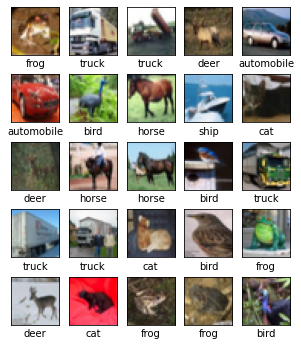

In [4]:
#displaying first 25 images from training dataset
plt.figure(figsize=(5,6))
for ind in range(25):
    plt.subplot(5,5,ind+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[ind])
    plt.xlabel(classes[y_train[ind][0]])
plt.show()

normalizing dataset

In [5]:
X_train, X_test = X_train/255, X_test/255

**CNN Model Training**

In [6]:
ModelCnn = keras.models.Sequential([
    ##CNN layers [feature mapping]
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    
    ##ANN layers
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10)
])
ModelCnn.summary()
#ReLU - rectified Linear Unit

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [7]:
ModelCnn.compile( optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
results = ModelCnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 268s 142ms/step - loss: 1.5816 - accuracy: 0.4164 - val_loss: 1.2795 - val_accuracy: 0.5500
Epoch 2/10
1563/1563 [==============================] - 239s 153ms/step - loss: 1.2174 - accuracy: 0.5668 - val_loss: 1.1403 - val_accuracy: 0.5991
Epoch 3/10
1563/1563 [==============================] - 256s 164ms/step - loss: 1.0621 - accuracy: 0.6266 - val_loss: 1.0711 - val_accuracy: 0.6241
Epoch 4/10
1563/1563 [==============================] - 256s 164ms/step - loss: 0.9597 - accuracy: 0.6642 - val_loss: 1.0472 - val_accuracy: 0.6396
Epoch 5/10
1563/1563 [==============================] - 246s 157ms/step - loss: 0.8851 - accuracy: 0.6903 - val_loss: 0.9515 - val_accuracy: 0.6689
Epoch 6/10
1563/1563 [==============================] - 202s 129ms/step - loss: 0.8293 - accuracy: 0.7100 - val_loss: 0.9009 - val_accuracy: 0.6877
Epoch 7/10
1563/1563 [==============================] - 186s 119ms/step - loss: 0.7846 - accuracy: 0.7278 - val_

**Model Evaluation**

Model Accuracy Scores

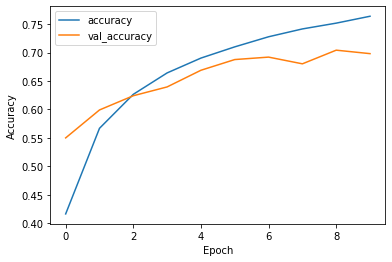

In [8]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [11]:
ModelCnn.evaluate(X_test, y_test)

313/313 [==============================] - 20s 63ms/step - loss: 0.8952 - accuracy: 0.6981


[0.8952446579933167, 0.6980999708175659]

Model Predictions

In [21]:
ModelCnn.predict(X_test[0][np.newaxis, ...])

array([[-2.0825052, -4.340429 , -1.1012006,  3.6862   , -4.416441 ,
         3.05535  , -1.477555 , -1.8942842,  1.4684081, -2.976198 ]],
      dtype=float32)

Confusion Matrix of the prediction

<AxesSubplot:>

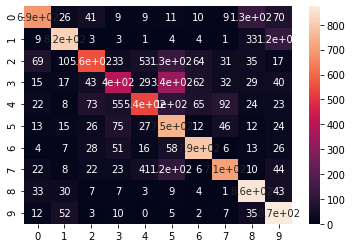

In [23]:
y_predicted = [np.argmax(i) for i in ModelCnn.predict(X_test)]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)  ##confusionmatrix
sn.heatmap(cm, annot=True)

Classification Report

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73      1000
           1       0.83      0.82      0.82      1000
           2       0.69      0.56      0.62      1000
           3       0.60      0.40      0.48      1000
           4       0.75      0.54      0.63      1000
           5       0.49      0.75      0.59      1000
           6       0.78      0.79      0.78      1000
           7       0.76      0.71      0.73      1000
           8       0.73      0.86      0.79      1000
           9       0.68      0.87      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.69     10000
weighted avg       0.71      0.70      0.69     10000

